# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

# I. Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(url)
with open('tweet-json.txt', 'wb') as f:
        f.write(r.content)

In [5]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

## 1. Twitter Archive

In [6]:
# See the data sample
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.shape

(2356, 17)

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.describe(include='O')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/740373189...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [11]:
twitter_archive.isna().mean()

tweet_id                      0.000000
in_reply_to_status_id         0.966893
in_reply_to_user_id           0.966893
timestamp                     0.000000
source                        0.000000
text                          0.000000
retweeted_status_id           0.923175
retweeted_status_user_id      0.923175
retweeted_status_timestamp    0.923175
expanded_urls                 0.025042
rating_numerator              0.000000
rating_denominator            0.000000
name                          0.000000
doggo                         0.000000
floofer                       0.000000
pupper                        0.000000
puppo                         0.000000
dtype: float64

In [12]:
twitter_archive.duplicated().sum()

0

In [13]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [14]:
twitter_archive['text'].duplicated().sum()

0

### Check the value of each column

In [15]:
twitter_archive['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive['doggo'].value_counts().sort_values()

doggo      97
None     2259
Name: doggo, dtype: int64

In [18]:
twitter_archive['floofer'].value_counts().sort_values()

floofer      10
None       2346
Name: floofer, dtype: int64

In [19]:
twitter_archive['pupper'].value_counts().sort_values()

pupper     257
None      2099
Name: pupper, dtype: int64

In [20]:
twitter_archive['puppo'].value_counts().sort_values()

puppo      30
None     2326
Name: puppo, dtype: int64

### Tweet Archive Quality issues
1. Data Type: "timestamp" column should be in datetime type

2. Outliers: there are some values greater than 10 in "rating_numerator" and some values are not equal to 10 in the "rating_denominator"

3. Unreasonable value: the 4 column "doggo", "floofer", "pupper" and "puppo" should have binary value like 0 and 1 to be the one-hot encoded column

4. We should remove retweets and replies records to meet the expectation

5. Remove redundant columns: source and expanded_urls

## 2. Image Prediction

In [21]:
# See the data samples
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_predictions.describe(include='O')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/ext_tw_video_thumb/67535...,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [25]:
image_predictions.isna().mean()

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [26]:
image_predictions.duplicated().sum()

0

In [27]:
image_predictions['tweet_id'].duplicated().sum()

0

In [28]:
image_predictions['jpg_url'].duplicated().sum()

66

In [29]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [30]:
image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [31]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

### Image Prediction Quality issues
1. Duplicate Images: 1 tweet should represent 1 image but we have some tweet that represent same image

2. We should keep only the most confident prediction for the dog type

3. Some entries are not dog name likes kimono, window_screen

4. We should merge this table to be part of the tweet archive table

## 3. tweet_json

In [32]:
# See the data sample
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
tweet_json.shape

(2354, 3)

In [34]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [35]:
tweet_json.isna().mean()

tweet_id          0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

In [36]:
tweet_json.duplicated().sum()

0

### Tweet Json Quality issues
1. We have actually no quality issues

2. This table should be merge to be part of the tweet archive table

## Quality Summaries:
Twitter_archive table

- Data Type: "timestamp" column should be in datetime type

- There are some values greater than 10 in "rating_numerator"

- There are some values are not equal to 10 in the "rating_denominator"

- We should remove retweets and replies records to meet the expectation

- Remove redundant columns: source and expanded_urls

Image_prediction table

- Duplicate Images: 1 tweet should represent 1 image but we have some tweet that represent same image

- We should keep only the most confident prediction for the dog type

- Some entries are not dog name likes kimono, window_screen

## Tidiness Summaries:

- Unreasonable value: the 4 column "doggo", "floofer", "pupper" and "puppo" should have binary value like 0 and 1 to be the one-hot encoded column
- We should merge the image prediction and tweet json to be part of the tweet archive to extract information easily

# 3. Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
twitter_archive_cleaned = twitter_archive.copy()
image_prediction_cleaned = image_predictions.copy()
tweet_json_cleaned = tweet_json.copy()

### 3.1. Quality

### Issue #1: "timestamp" column should be datetime

#### Define: remove +0000 and change to datetime

#### Code

In [38]:
twitter_archive_cleaned['timestamp'] = twitter_archive_cleaned.timestamp.str[:-6]
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

#### Test

In [39]:
twitter_archive_cleaned['timestamp'].value_counts().head(10)

2016-09-12 15:10:21    1
2016-01-01 05:00:24    1
2016-01-08 03:50:03    1
2017-01-31 01:27:39    1
2016-10-13 23:23:56    1
2016-06-27 01:37:04    1
2016-07-26 00:08:05    1
2016-01-05 02:30:55    1
2016-12-14 17:16:53    1
2015-11-27 22:01:40    1
Name: timestamp, dtype: int64

### Issue #2: Outliers: there are some values are not equal to 10 in the "rating_denominator"

#### Define
Filter rating_denominator not equal to 10 and correct these ratings by checking the right ratings in the "text" column.
- If the numerator is exceed the denominator, normalize them to 10
- If the numerator is less the denominator, normalize them exactly

#### Code

In [40]:
abnormal_rates_df = twitter_archive_cleaned[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = abnormal_rates_df[abnormal_rates_df['rating_denominator'] != 10]

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [41]:
abnormal_denominator_list = list(twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] != 10]['tweet_id'])
abnormal_denominator_list

[835246439529840640,
 832088576586297345,
 820690176645140481,
 810984652412424192,
 775096608509886464,
 758467244762497024,
 740373189193256964,
 731156023742988288,
 722974582966214656,
 716439118184652801,
 713900603437621249,
 710658690886586372,
 709198395643068416,
 704054845121142784,
 697463031882764288,
 686035780142297088,
 684225744407494656,
 684222868335505415,
 682962037429899265,
 682808988178739200,
 677716515794329600,
 675853064436391936,
 666287406224695296]

In [42]:
# Set all the wrong 'rating_denominator' to 10
mask = twitter_archive_cleaned['rating_denominator'] != 10 # Find the values in 'rating_denominator' that are not equal to 10
# Replace the values of rating_denominator with 10
twitter_archive_cleaned.loc[mask, 'rating_denominator'] = 10
# Observing that most of the case the rating_numerator is exceed 10, I will normalize them to 10 for all
# replace the values of rating_numerator
twitter_archive_cleaned.loc[mask, 'rating_numerator'] = 10

# But there are some specially case that we need to manually normalize
# tweet_id: 709198395643068416, normalize the rating from 45/50 to 9/10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == 709198395643068416, 'rating_numerator'] = 9
# tweet_id: 686035780142297088, normalize the rating from 4/20 to 2/10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == 686035780142297088, 'rating_numerator'] = 2
# tweet_id: 666287406224695296, fix to right rating_numerator
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9

#### Test

In [43]:
twitter_archive_cleaned[twitter_archive_cleaned['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: Outliers: there are some values are greater than 10 in the "rating_numerator"

#### Define
Filter rating_numerator greater than 10 and replace them to 10 for all

#### Code

In [44]:
abnormal_rates_df = twitter_archive_cleaned[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [45]:
abnormal_rates_df['rating_numerator'].value_counts()

12      558
10      481
11      463
13      351
9       158
8       102
14      54 
7       54 
5       37 
6       32 
3       19 
4       15 
2       10 
1       8  
75      2  
0       2  
420     2  
15      2  
26      1  
182     1  
27      1  
1776    1  
17      1  
666     1  
Name: rating_numerator, dtype: int64

In [46]:
# Set all the 'rating_numerator' from range 11-15 to 10
mask = twitter_archive_cleaned['rating_numerator'].isin([11, 12, 13, 14, 15, 17])
# Replace the values of rating_denominator with 10
twitter_archive_cleaned.loc[mask, 'rating_numerator'] = 10

In [47]:
abnormal_rates_df = twitter_archive_cleaned[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

In [48]:
# Filter rating_numerator greater than 15 and find the reason cause these wrong values
df_abnormal_denominator = abnormal_rates_df[abnormal_rates_df['rating_numerator'] > 17]

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


In [49]:
# Set all the 'rating_numerator' from range 11-15 to 10
mask = twitter_archive_cleaned['rating_numerator'] > 17
# Replace the values of rating_denominator with 10
twitter_archive_cleaned.loc[mask, 'rating_numerator'] = 10

#### Test

In [50]:
twitter_archive_cleaned[twitter_archive_cleaned['rating_numerator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: We should remove retweets and replies records to meet the expectation

#### Define
- Only keep the rows where retweeted_status_id column is NaN.
- Only keep the rows where in_reply_to_status_id column is NaN
- Drop all the column related to retweets and replies

In [51]:
print('Before removing: ', twitter_archive_cleaned.shape[0])
# Remove retweets
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['retweeted_status_id'].isna()]

# Remove replies
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned['in_reply_to_status_id'].isna()]
print('After removing: ', twitter_archive_cleaned.shape[0])

Before removing:  2356
After removing:  2097


In [52]:
# Drop all the column related to retweets and replies
twitter_archive_cleaned.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [53]:
twitter_archive_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [54]:
twitter_archive_cleaned.isna().mean()

tweet_id              0.000000
timestamp             0.000000
source                0.000000
text                  0.000000
expanded_urls         0.001431
rating_numerator      0.000000
rating_denominator    0.000000
name                  0.000000
doggo                 0.000000
floofer               0.000000
pupper                0.000000
puppo                 0.000000
dtype: float64

### Issue #5: Remove redundant columns: source and expanded_urls

#### Define
Drop the source and expanded_urls columns

In [55]:
twitter_archive_cleaned.drop(columns=['source', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [56]:
twitter_archive_cleaned.isna().mean()

tweet_id              0.0
timestamp             0.0
text                  0.0
rating_numerator      0.0
rating_denominator    0.0
name                  0.0
doggo                 0.0
floofer               0.0
pupper                0.0
puppo                 0.0
dtype: float64

### Issue #6: Duplicate Images: 1 tweet should represent 1 image but we have some tweet that represent same image

#### Define
Use drop_duplicates function to drop duplicates of the jpg_url

In [57]:
image_prediction_cleaned.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test


In [58]:
image_prediction_cleaned['jpg_url'].duplicated().sum()

0

### Issue #7: We should keep only the most confident prediction for the dog type

In [59]:
image_prediction_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [60]:
image_prediction_cleaned[image_prediction_cleaned['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


#### Define
- if p1_dog = True then store the p1_confident  into the confident and store the correspond  dog_breed_1 to the new column dog breed
- else if p2_dog = True then store the p2_confident  into the confident and store the correspond  dog_breed_2 to the new column dog breed
- else if p3_dog = True then store the p3_confident into the confident and store the correspond  dog_breed_3 to the new column dog breed
- else fill 0 for confident and "Unknown" for dog_breed

In [61]:
# Create two new empty columns
image_prediction_cleaned['confident'] = ""
image_prediction_cleaned['dog_breed'] = ""

# Iterate over each row
for index, row in image_prediction_cleaned.iterrows():
    # Check if p1_dog is True
    if row['p1_dog']:
        image_prediction_cleaned.at[index, 'confident'] = row['p1_conf']
        image_prediction_cleaned.at[index, 'dog_breed'] = row['p1']
    # Check if p2_dog is True
    elif row['p2_dog']:
        image_prediction_cleaned.at[index, 'confident'] = row['p2_conf']
        image_prediction_cleaned.at[index, 'dog_breed'] = row['p2']
    # Store p3_confident and dog_breed_3 as fallback
    elif row['p3_dog']:
        image_prediction_cleaned.at[index, 'confident'] = row['p3_conf']
        image_prediction_cleaned.at[index, 'dog_breed'] = row['p3']
    else:
        image_prediction_cleaned.at[index, 'confident'] = 0
        image_prediction_cleaned.at[index, 'dog_breed'] = 'Unknown'

#### Test

In [62]:
image_prediction_cleaned.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confident,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,0.651137,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,0,Unknown


In [63]:
# Remove the redundant old columns
image_prediction_cleaned.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], \
                             inplace=True)
image_prediction_cleaned.head(2)

,tweet_id,jpg_url,img_num,confident,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,redbone


### 3.2 Tidiness

### Issue #1: Unreasonable value: the 4 column "doggo", "floofer", "pupper" and "puppo" should have binary value like 0 and 1 to be the one-hot encoded column

#### Define
column_list = "doggo", "floofer", "pupper" and "puppo"
Loop to these columns then:
- if value = "None" then replace to 0
- else replace to 1

In [64]:
column_list = ["doggo", "floofer", "pupper", "puppo"]
for column in column_list:
    twitter_archive_cleaned[column] = twitter_archive_cleaned[column].apply(lambda x: 0 if x == 'None' else 1)

#### test

In [65]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,10,Archie,0,0,0,0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,10,Darla,0,0,0,0
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,10,Franklin,0,0,0,0


In [66]:
twitter_archive_cleaned['doggo'].value_counts()

0    2014
1    83  
Name: doggo, dtype: int64

### Issue #2: We should merge the image prediction and tweet json to be part of the tweet archive to extract information easily

In [67]:
print("Before merging: ", twitter_archive_cleaned.shape[0])

Before merging:  2097


In [68]:
# Merge image_prediction to twitter_archive
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, image_prediction_cleaned,
                            on = ['tweet_id'], how = 'left')

In [69]:
# Merge tweet_json to twitter_archive
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, tweet_json_cleaned,
                            on = ['tweet_id'], how = 'left')

In [70]:
print("After merged: ", twitter_archive_cleaned.shape[0])

After merged:  2097


In [71]:
twitter_archive_cleaned['confident'] = twitter_archive_cleaned['confident'].astype(float)

#### Test

In [72]:
twitter_archive_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,confident,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10,10,Phineas,0,0,0,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,0.000000,Unknown,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,10,Tilly,0,0,0,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,10,Archie,0,0,0,0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,10,Darla,0,0,0,0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,0.168086,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,10,Franklin,0,0,0,0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,0.555712,basset,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
twitter_archive_cleaned.to_csv('twitter_archive_master.csv')

# 4. Analyzing and Visualizing Data

### 4.1. How is the distribution of ratings of WeRateDog?

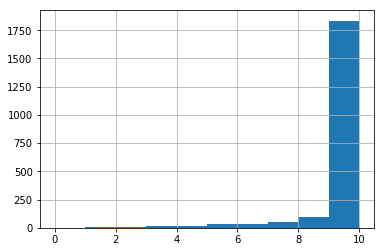

In [74]:
twitter_archive_cleaned['rating_numerator'].hist()

The analysis reveals that the majority of the tweets (80%) in the dataset have received a high rating of 10/10 for the dogs featured. This indicates a predominantly positive response from the audience towards the dogs.

This finding suggests that a significant number of people who shared these tweets expressed their admiration and appreciation for the dogs showcased. The high percentage of positive ratings indicates that the content related to dogs generally resonates well with the audience and elicits positive sentiments.

### 4.2. Which dog breeds receive the most average ratings?

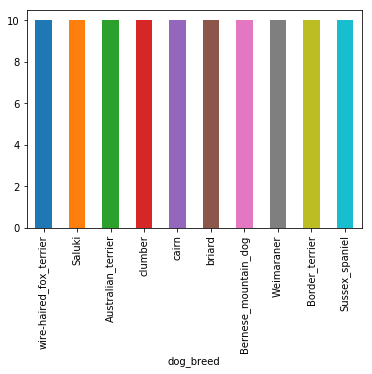

In [75]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown'].groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False).head(10).plot.bar()

The analysis indicates that the wire-haired fox terrier, Saluki, Australian terrier, and Dalmatian are the dog breeds that received the highest average ratings in the dataset.

This finding highlights the exceptional appeal and positive reception of these specific breeds among the Twitter users. The high average ratings suggest that these breeds are widely regarded as favorable or impressive by the audience.

### 4.3. Which dog breeds have the most tweet?

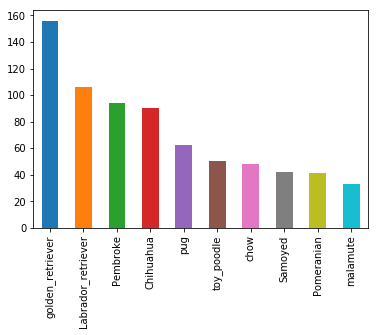

In [76]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown']['dog_breed'].value_counts().sort_values(ascending=False).head(10).plot.bar()

### 4.4. Which dog breeds have the most retweet?

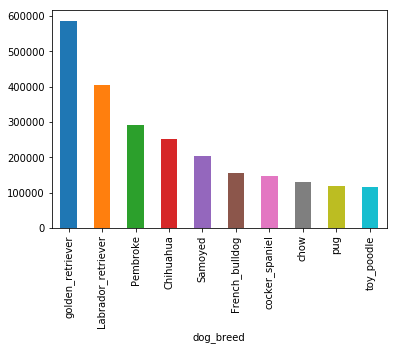

In [77]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown'].groupby('dog_breed')['retweet_count'].sum().sort_values(ascending=False).head(10).plot.bar()

### 4.5. Which dog breeds have the most favorite?

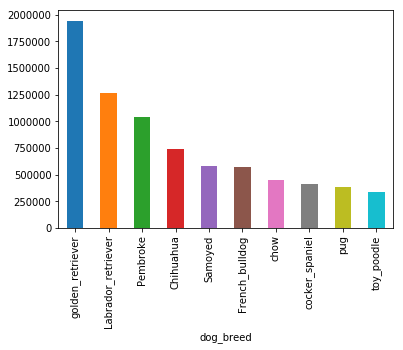

In [78]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown'].groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(10).plot.bar()

Based on the analysis, several key insights can be drawn:

The top four popular dog breeds across all metrics (tweet count, retweet count, and favorite count) are consistently Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua. These breeds exhibit a significant presence and engagement within the Twitter community.

Golden Retriever emerges as the most popular breed, consistently ranking first in all three categories. This breed attracts a substantial amount of attention, retweets, and favorites, indicating its widespread appeal and popularity.

Labrador Retriever, Pembroke, and Chihuahua consistently rank high in all metrics, demonstrating their enduring popularity among Twitter users. These breeds have established themselves as favorites within the dog-loving community.

The breeds that follow the top four vary slightly in rankings based on retweets and favorites, possibly due to the correlation between retweets and favorites. French Bulldog, Cocker Spaniel, Chow, and Malamute make appearances in the top 10 based on retweets or favorites, indicating their significant engagement and appreciation among users.

Overall, Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua stand out as the most popular and well-received dog breeds on Twitter. Their consistent presence across multiple metrics highlights their widespread appeal and indicates the strong interest and admiration of Twitter users towards these breeds.

### 4.6. Which dog breeds have the most/least confident?

Which dog breeds have the most confident?

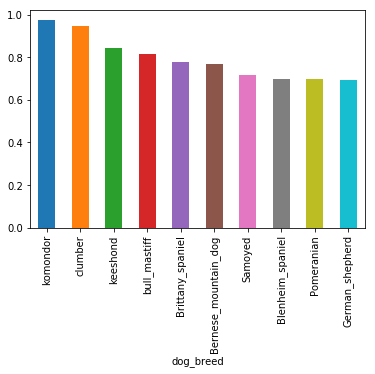

In [79]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown'].groupby('dog_breed')['confident'].mean().sort_values(ascending=False).head(10).plot.bar()

Which dog breeds have the least confident?

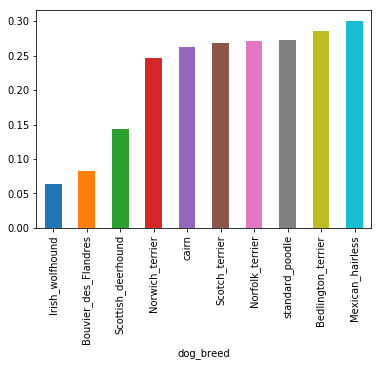

In [80]:
twitter_archive_cleaned[twitter_archive_cleaned['dog_breed'] != 'Unknown'].groupby('dog_breed')['confident'].mean().sort_values().head(10).plot.bar()

Based on the analysis, we have identified several key insights regarding the confident scores of different dog breeds.

The breeds with the highest confident scores include Komondor, Dalmatian, Keeshond, and Bull Mastiff. These breeds received the highest levels of confidence in their classification or prediction within the dataset.

On the other hand, the breeds with the lowest confident scores are Irish Wolfhound, Bouvier des Flandres, Scottish Deerhound, and Norwich Terrier. These breeds had lower levels of confidence in their classification or prediction within the dataset.

It is important to note that the confident scores reflect the level of certainty or accuracy in the predictions made by the model used for classification. Higher confident scores indicate a higher degree of confidence in the predicted breed, while lower confident scores suggest more uncertainty.

These insights provide information about the reliability of the model's predictions for different dog breeds. Breed classifications with high confident scores are more likely to be accurate, while those with low confident scores should be interpreted with caution due to the potential for misclassification or ambiguity.

### 4.7. Do all the tweets have Dog Stage?

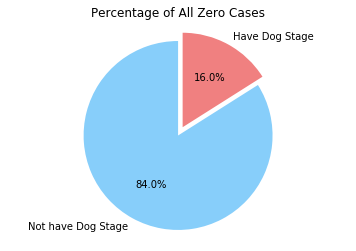

In [81]:
# Count the cases where all four columns are equal to 0
total_count = len(twitter_archive_cleaned)
zero_count = len(twitter_archive_cleaned[(twitter_archive_cleaned['doggo'] == 0) & (twitter_archive_cleaned['floofer'] == 0) & (twitter_archive_cleaned['pupper'] == 0) & (twitter_archive_cleaned['puppo'] == 0)])

# Calculate the percentage
percentage = (zero_count / total_count) * 100

# Create a pie chart
labels = ['Not have Dog Stage', 'Have Dog Stage']
sizes = [zero_count, total_count - zero_count]
explode = (0.1, 0)  # Explode the 'All Zeros' slice
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Percentage of All Zero Cases')
plt.show()

Based on the analysis, it can be concluded that a large majority of the tweets (84%) in the dataset do not have any specified dog stage. It indicates that the dog stage information is not commonly mentioned or emphasized in the tweets, which may impact further analysis or interpretation of the data.